# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 560


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lon = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lon": city_lon,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )
        
    except:
        print("City not found. Skipping...")
        pass # could this be continue?

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | colares
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | ploneour-lanvern
Processing Record 8 of Set 1 | haiku-pauwela
Processing Record 9 of Set 1 | thabazimbi
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | ilomantsi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | gorontalo
Processing Record 18 of Set 1 | fada
Processing Record 19 of Set 1 | vorkuta
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | blackmans bay
Processing Record

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lon           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,304.54,82,40,6.69,MP,1731637944
1,adamstown,-25.0660,-130.1015,296.46,87,80,3.93,PN,1731637689
2,grytviken,-54.2811,-36.5092,273.87,68,86,4.52,GS,1731637946
3,port mathurin,-19.6833,63.4167,297.45,75,10,7.46,MU,1731637947
4,colares,38.7992,-9.4469,287.53,83,54,8.18,PT,1731637948


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,304.54,82,40,6.69,MP,1731637944
1,adamstown,-25.0660,-130.1015,296.46,87,80,3.93,PN,1731637689
2,grytviken,-54.2811,-36.5092,273.87,68,86,4.52,GS,1731637946
3,port mathurin,-19.6833,63.4167,297.45,75,10,7.46,MU,1731637947
4,colares,38.7992,-9.4469,287.53,83,54,8.18,PT,1731637948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

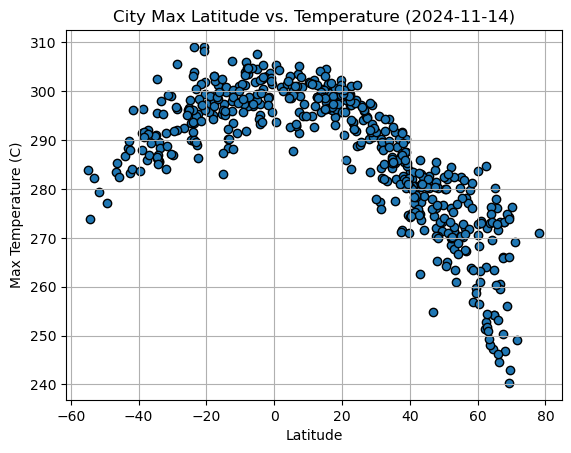

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-11-14)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

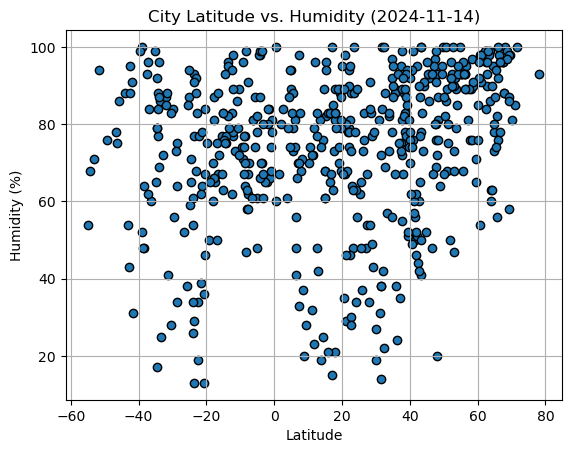

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-11-14)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

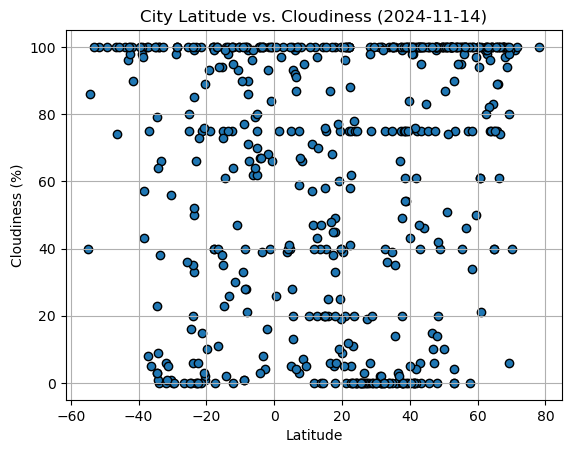

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-11-14)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

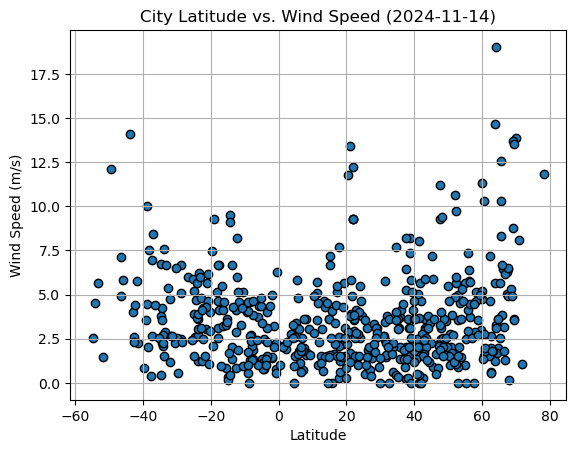

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-11-14)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title="title", xlabel="xlabel", ylabel="ylabel"):

    # plot
    plt.scatter(x, y)
    # linear regression line
    slope, intercept, r_value, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, color="red")
    plt.text(x.min(), y.min(), f"y={slope:.2f}x+{intercept:.2f}", color="red", fontsize=14)
    print(f"The r^2-value is {r_value**2}")

    # formatting
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,304.54,82,40,6.69,MP,1731637944
4,colares,38.7992,-9.4469,287.53,83,54,8.18,PT,1731637948
5,klyuchi,52.2667,79.1667,268.50,92,100,5.66,RU,1731637902
6,ploneour-lanvern,47.9000,-4.2833,280.33,93,0,3.09,FR,1731637951
7,haiku-pauwela,20.9219,-156.3051,299.16,67,20,13.41,US,1731637952


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,296.46,87,80,3.93,PN,1731637689
2,grytviken,-54.2811,-36.5092,273.87,68,86,4.52,GS,1731637946
3,port mathurin,-19.6833,63.4167,297.45,75,10,7.46,MU,1731637947
8,thabazimbi,-24.5917,27.4116,290.02,71,16,2.62,ZA,1731637953
9,atafu village,-8.5421,-172.5159,301.22,77,100,4.57,TK,1731637954


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is 0.7667373670761571


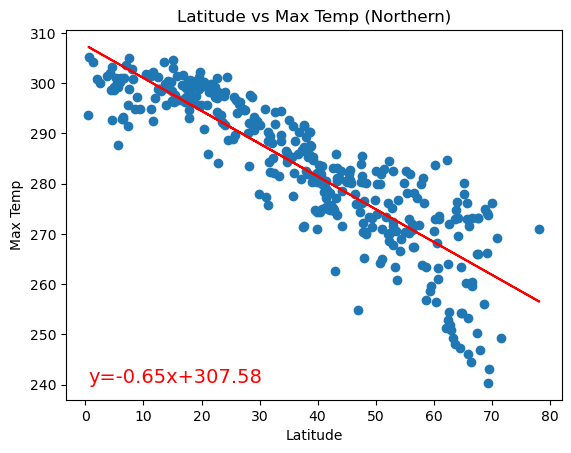

In [116]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], title="Latitude vs Max Temp (Northern)", xlabel="Latitude", ylabel="Max Temp")

The r^2-value is 0.47574251608149926


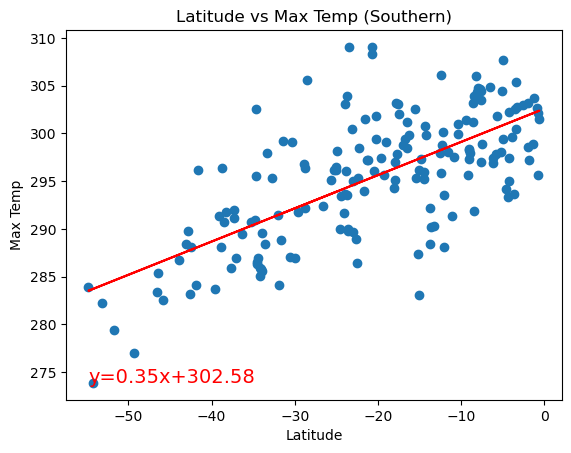

In [117]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], title="Latitude vs Max Temp (Southern)", xlabel="Latitude", ylabel="Max Temp")

* As the Latitude goes up and away from 0, the Max Temp goes down (r^2 value is .77)
* As the Latitude goes down and away from 0, the Max Temp also goes down but in a less consistent way (r^2 value is only .48)

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.11360651616488225


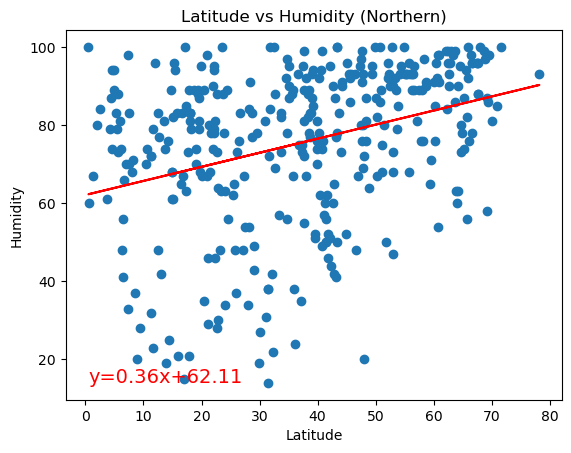

In [118]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], title="Latitude vs Humidity (Northern)", xlabel="Latitude", ylabel="Humidity")

The r^2-value is 0.008017403896917326


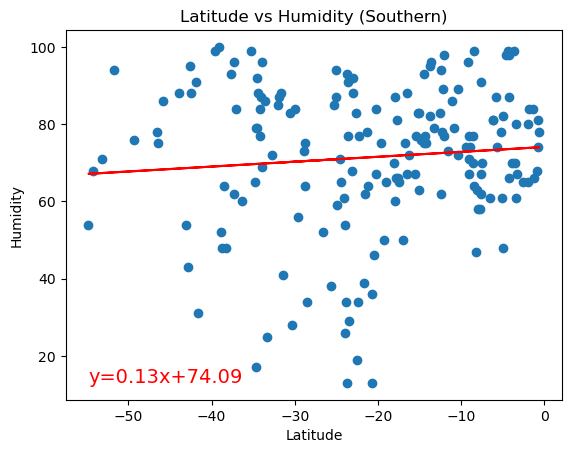

In [120]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], title="Latitude vs Humidity (Southern)", xlabel="Latitude", ylabel="Humidity")

* As the Latitude goes up and away from 0, Humidity appears to trend upward but not really because the r^2 value is .11
* As the Latitude goes down and away from 0, Humidity can barely be said to go down (r^2 value is a mere .008)

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is 0.1115833605780564


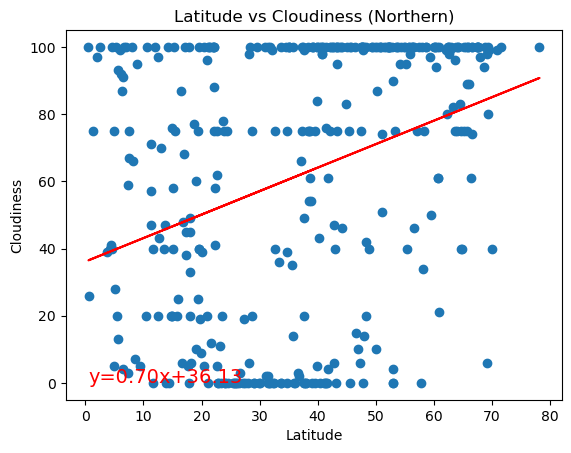

In [121]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], title="Latitude vs Cloudiness (Northern)", xlabel="Latitude", ylabel="Cloudiness")

The r^2-value is 1.3108625857431137e-05


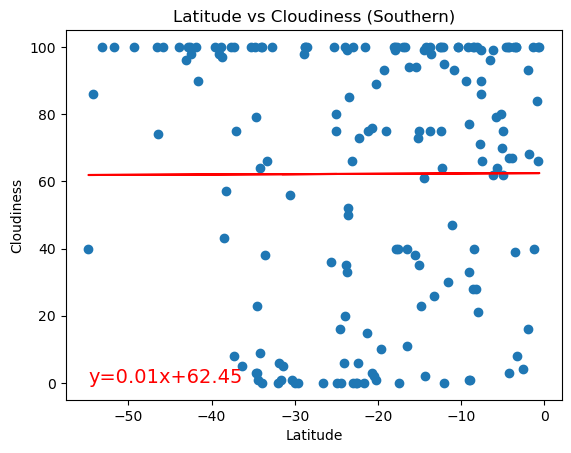

In [123]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], title="Latitude vs Cloudiness (Southern)", xlabel="Latitude", ylabel="Cloudiness")

* As the Latitude goes up and away from 0, Cloudiness doesn't go up or down in any clear direction
* As the Latitude goes down and away from 0, Cloudiness still doesn't go up or down in any clear direction

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is 0.07175200764683158


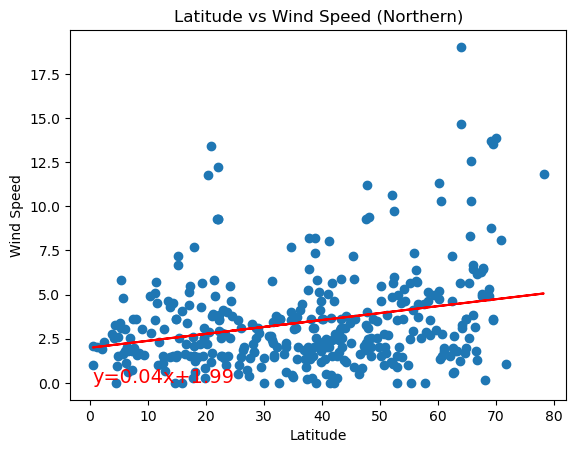

In [124]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], title="Latitude vs Wind Speed (Northern)", xlabel="Latitude", ylabel="Wind Speed")

The r^2-value is 0.0895598087632015


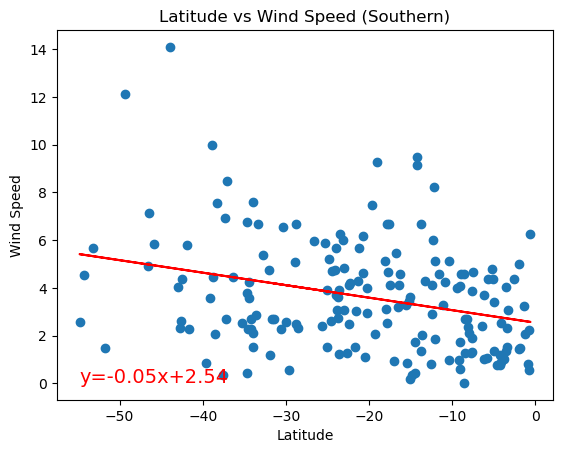

In [125]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], title="Latitude vs Wind Speed (Southern)", xlabel="Latitude", ylabel="Wind Speed")

* As the Latitude goes up and away from 0, Wind Speed appears to go up but has important outliers (r^2 value being .07)
* As the Latitude goes down and away from 0, Cloudiness still appears to go up but also has important outliers (r^2 value being .09)